In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
from branchcut.exampleCreator import createExample, createUnwrappedBaseline, TrueBranchCuts
from branchcut.unwrap import *
from branchcut.setup import find_residues, create_mask, wrap
from branchcut.branchCut import branch_cut

Text(0.5, 0.98, 'LONGS')

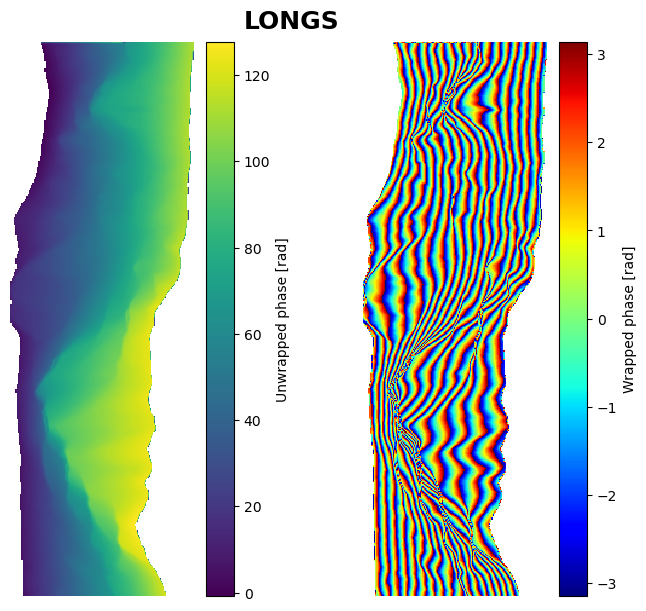

In [71]:
DIR = '../data/simulated_data_book'
EXAMPLE = 'longs.152x458'
SHAPE = (458,152) #long
#EXAMPLE = 'isola.157x458'
#SHAPE = (458,157) #isola

vars = ['mask','phase','surf']
dtypes = ['uint8','int8','>f4']
data = {}
for i,v in enumerate(vars):
    filename =EXAMPLE+'.'+v
    data[v]=np.fromfile(os.path.join(DIR,filename),dtype=dtypes[i]).reshape(SHAPE)

data['mask'] = data['mask'].astype(bool)
#data['phase'] = np.pi * (data['phase'] + 128) / 128 - np.pi # wrapped phase in radians
#data['phase'][~data['mask']] = np.nan
data['surf'][~data['mask']] = np.nan

data['phase'] = wrap(data['surf'])

fig, ax = plt.subplots(1,2, sharey=True, layout='constrained', figsize=(7,6))
im = ax[0].imshow(data['surf'])
ax[0].axis('off')
fig.colorbar(im, label = "Unwrapped phase [rad]")

im = ax[1].imshow(data['phase'],cmap='jet',interpolation='nearest')
ax[1].axis('off')
fig.colorbar(im, label = "Wrapped phase [rad]")

fig.suptitle("LONGS",fontsize = 18,fontweight="bold")

#plt.savefig('isola.pdf')

In [72]:
seed = (40,40)
residues = find_residues(data['phase'])
BranchCuts = branch_cut(residues)
BranchCuts[~data['mask']] = True
phase_unwrapped_BC = unwrap(data['phase'],seed=seed, branchCuts=BranchCuts, mode='bfs', unwrapBranchPixels=True)
phase_unwrapped_BC_2 = unwrap(data['phase'],seed=seed, branchCuts=BranchCuts, mode='dfs',unwrapBranchPixels=True)

c:\Users\emilt\Documents\Noter\9_RemoteSensing\BranchCut\tests\..\branchcut\setup\setup.py:104: RuntimeWarning: invalid value encountered in cast
  return _np.round(out).astype(int)
c:\Users\emilt\Documents\Noter\9_RemoteSensing\BranchCut\tests\..\branchcut\branchCut\branchCut.py:153: RuntimeWarning: overflow encountered in scalar add
  charge += residue[p]


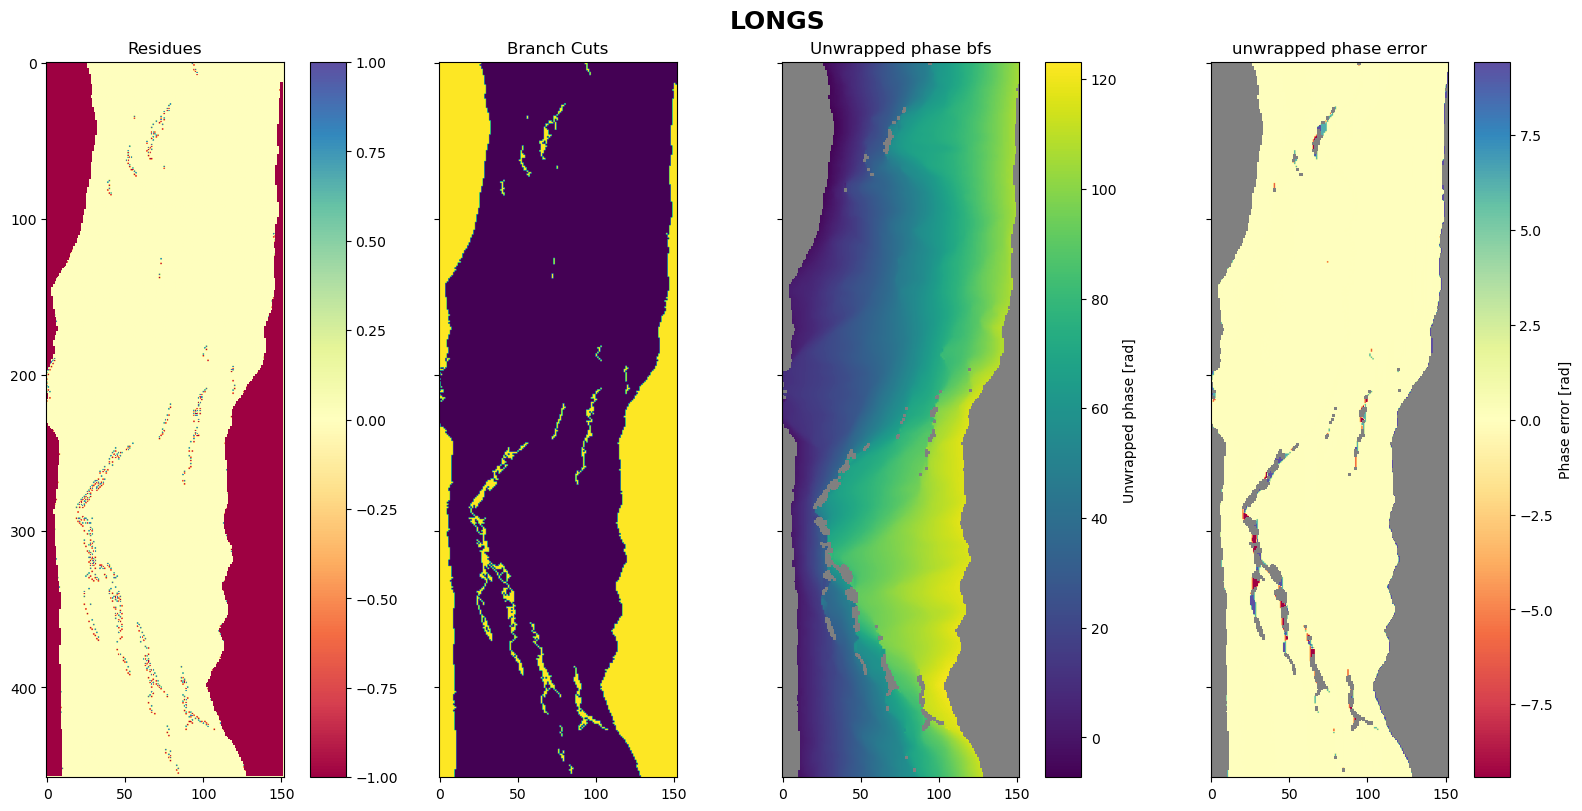

In [ ]:
fig, ax = plt.subplots(1,4, sharey=True, layout='constrained', figsize=(16,8))

im = ax[0].imshow(residues, vmin=-1, vmax=1,cmap='Spectral')
ax[0].set_title('Residues')
ax[0].set_facecolor('gray')
fig.colorbar(im)

im = ax[1].imshow(BranchCuts)
ax[1].set_title('Branch Cuts')
ax[1].set_facecolor('gray')


im = ax[2].imshow(phase_unwrapped_BC)
#im = ax[2].imshow(phase_unwrapped_BC ,vmin=-6*np.pi,vmax=-4*np.pi, cmap='bwr')
ax[2].set_title('Unwrapped phase bfs')
ax[2].set_facecolor('gray')
fig.colorbar(im, label='Unwrapped phase [rad]')

error = phase_unwrapped_BC  - data['surf']
im = ax[3].imshow(error - np.nanmedian(error), cmap='Spectral', vmin=-3*np.pi,vmax=3*np.pi)
ax[3].set_facecolor('gray')
#im = ax[3].imshow(phase_unwrapped_BC_2 ,vmin=-6*np.pi,vmax=-4*np.pi, cmap='bwr')
ax[3].set_title('unwrapped phase error')
fig.colorbar(im, label='Phase error [rad]')

fig.suptitle("LONGS",fontsize = 18,fontweight="bold")

#plt.savefig('longsResults.pdf')

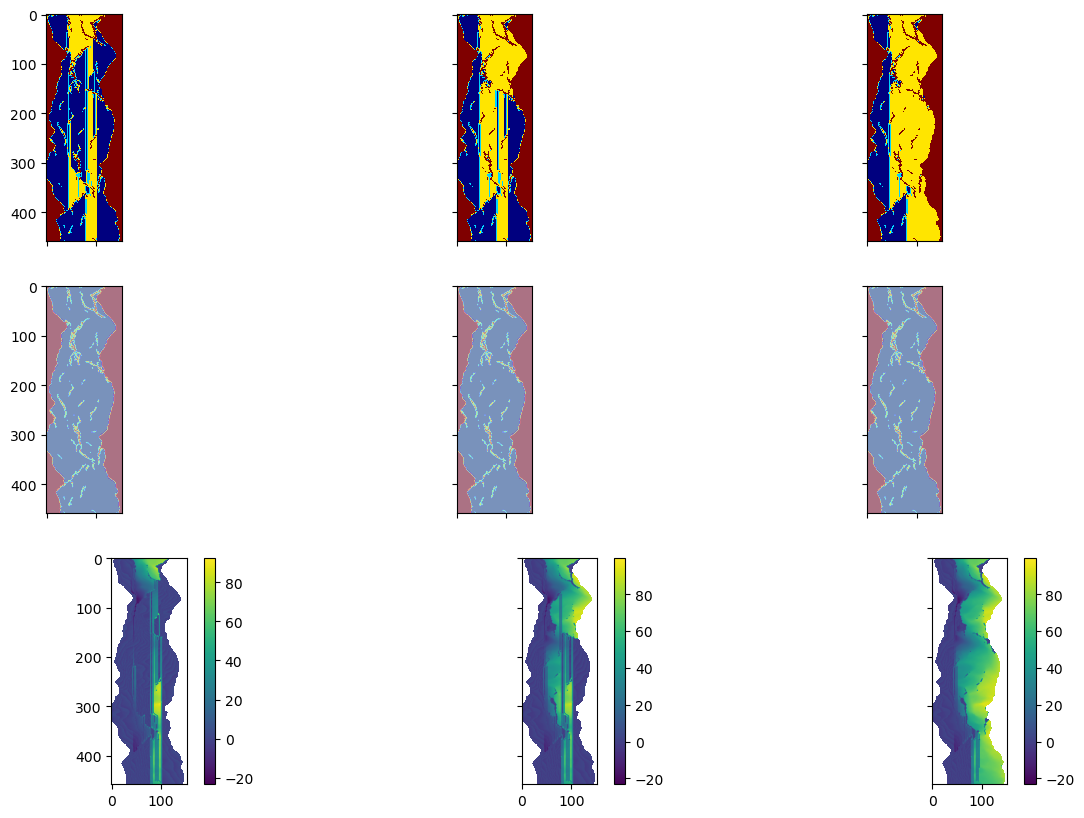

In [45]:
Area = [0,458,0,152]

fig, ax = plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
seed = (40,40)

cmap = plt.get_cmap('jet', 4)

displayer = unWrapDisplayer(data['phase'], seed=seed, branchCuts=BranchCuts, mode='dfs')
for a in range(3):
    for i in range(10000):
        displayer.update()
    
    image = displayer.adjoin.astype(int) + displayer.unwrapped.astype(int)
    image[BranchCuts] = 3
    im = ax[0,a].imshow(image[Area[0]:Area[1],Area[2]:Area[3]],cmap=cmap)

    
    ax[1,a].imshow(residues[Area[0]:Area[1],Area[2]:Area[3]],alpha=0.33,vmin=-1,vmax=1)
    ax[1,a].imshow(BranchCuts[Area[0]:Area[1],Area[2]:Area[3]],alpha=0.33,cmap='jet')
    #ax[1,a].imshow(image[250:300,:75]==3,alpha=0.33)
    
    im = ax[2,a].imshow(displayer.f_phase[Area[0]:Area[1],Area[2]:Area[3]])
    fig.colorbar(im)
    #ax[2,a].imshow(residues[Area[0]:Area[1],Area[2]:Area[3]],vmin=-1,vmax=1)
    
    #ax[2,a].imshow(displayer.f_phase[Area[0]:Area[1],Area[2]:Area[3]])